<a href="https://colab.research.google.com/github/Nova1323/Machine-Learning/blob/master/Natural%20Language%20Processing/Twitter_Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import pandas as pd
import tweepy as tw

In [ ]:
# Authenticate to Twitter
auth = tw.OAuthHandler("trAm8wZD11mQgN1ocV6FVngZ3", "J800JrNuCniKxL2FlAon6IDBjGnXys52imGXy0srthuWCRckZZ")
auth.set_access_token("2744929320-rAV9p5JTDV5BNzVEHhs5xOhkShzTasLWPr9UbW8", "fd4WhOwyEL5fTLfoGF9NgB8zLG5YRWRG3CG82FTkF5I9I")

# Create API object
api = tw.API(auth,wait_on_rate_limit=True)

In [ ]:
search_words = "#coronavirus OR #covid19 OR #lockdown" #enter the words to be searched here
date_since = "2020-07-07" #enter the date from which you want the data to be searched from yyyy/mm/dd
geocodes = "20.593700, 78.962900, 100mi"

In [ ]:
tweets = tw.Cursor(api.search,
              q=search_words,
              geocode=geocodes,
              lang="en",
              since=date_since).items(360) #change items for the max number of tweet pulls

In [ ]:
tweet_details = [[tweet.text, tweet.user.location] for tweet in tweets]
#extracts the text and location of the tweet
tweet_details

[]

In [ ]:
tweet_df = pd.DataFrame(data=tweet_details, columns=['text', "location"])
pd.set_option('max_colwidth', 800)
tweet_df.head(25)

,text,location


In [ ]:
tweet_df.location.value_counts() #counts the number of tweets from a specific location

                     112
London, England        5
United States          5
UK                     5
India                  5
                    ... 
Riyadh                 1
GUWAHATI               1
ଭାରତବର୍ଷ               1
Liverpool              1
Jamshedpur, India      1
Name: location, Length: 212, dtype: int64

In [ ]:
#cleaning the data
import re
def clean_tweets(text):
    text = re.sub("RT @[\w]*:","",text)
    text = re.sub("@[\w]*","",text)
    text = re.sub("https?://[A-Za-z0-9./]*","",text)
    text = re.sub("\n","",text)
    return text

In [ ]:
#lambda function implemtnts the clean function on every row of the dataframe 
tweet_df['text']=tweet_df['text'].apply(lambda x: clean_tweets(x))
tweet_df.head(25)

,text,location
0,"Nigeria records 503 new cases of Coronavirus, total now 29,879#headlines #COVID19 #NCDC #COVID…",Abuja
1,"Students' life is more important than exam. In this situation when #Covid19 cases raising day by day, taking examination can be d…",
2,#COVID19 #CovidTrackerApp Scientists warn of potential waveof COVID-linked brain damage,"Dublin City, Ireland"
3,"Students' life is more important than exam. In this situation when #Covid19 cases raising day by day, taking examination…",
4,"""She's the head cook at a local nursing home. These days, she's working up to 75 hours a week, but it still hasn't been e…","Not A Bot, USA"
5,Let us get you started with this free webinar on Cyber Security. Save yourself millions of Naira by joining this 1…,
6,"Don’t plan to celebrate THIS MEMORIAL DAY. Instead plan to MOURN the UNNECESSARY LOSS of 100,000+ lives to #COVID19 T…",Australia
7,"#COVID19 will bump the cosmic mental institution ""Planet Earth"" to the next level.",
8,"#Disney said Tuesday that the company will continue the phased reopening of its theme parks in #Orlando, #Florida, on Satu…",
9,T 3586 - In these #COVID19 times a lot of work that you never did before now has to be done single-handedly .. …,Украина


In [ ]:
#library for Sentiment Analysis
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [ ]:
sia = SentimentIntensityAnalyzer()
#getting the sentiment scores of the tweets
tweet_df['sentiment_score']=tweet_df['text'].apply(lambda x: sia.polarity_scores(x)['compound'])
tweet_df.head(25)

,text,location,sentiment_score
0,"Nigeria records 503 new cases of Coronavirus, total now 29,879#headlines #COVID19 #NCDC #COVID…",Abuja,0.0000
1,"Students' life is more important than exam. In this situation when #Covid19 cases raising day by day, taking examination can be d…",,0.2716
2,#COVID19 #CovidTrackerApp Scientists warn of potential waveof COVID-linked brain damage,"Dublin City, Ireland",-0.5574
3,"Students' life is more important than exam. In this situation when #Covid19 cases raising day by day, taking examination…",,0.2716
4,"""She's the head cook at a local nursing home. These days, she's working up to 75 hours a week, but it still hasn't been e…","Not A Bot, USA",0.0000
5,Let us get you started with this free webinar on Cyber Security. Save yourself millions of Naira by joining this 1…,,0.8582
6,"Don’t plan to celebrate THIS MEMORIAL DAY. Instead plan to MOURN the UNNECESSARY LOSS of 100,000+ lives to #COVID19 T…",Australia,-0.4340
7,"#COVID19 will bump the cosmic mental institution ""Planet Earth"" to the next level.",,0.0000
8,"#Disney said Tuesday that the company will continue the phased reopening of its theme parks in #Orlando, #Florida, on Satu…",,0.0000
9,T 3586 - In these #COVID19 times a lot of work that you never did before now has to be done single-handedly .. …,Украина,0.0000


In [ ]:
#overall sentiment of the tweet
sentiment=[]
for score in tweet_df['sentiment_score']:
  if score > 0.33:
    sentiment.append("Positive")
  elif score < -0.33:
    sentiment.append("Negative")
  else:
    sentiment.append("Neutral")
tweet_df['Sentiment']=sentiment
tweet_df.head(25)

,text,location,sentiment_score,Sentiment
0,"Nigeria records 503 new cases of Coronavirus, total now 29,879#headlines #COVID19 #NCDC #COVID…",Abuja,0.0000,Neutral
1,"Students' life is more important than exam. In this situation when #Covid19 cases raising day by day, taking examination can be d…",,0.2716,Neutral
2,#COVID19 #CovidTrackerApp Scientists warn of potential waveof COVID-linked brain damage,"Dublin City, Ireland",-0.5574,Negative
3,"Students' life is more important than exam. In this situation when #Covid19 cases raising day by day, taking examination…",,0.2716,Neutral
4,"""She's the head cook at a local nursing home. These days, she's working up to 75 hours a week, but it still hasn't been e…","Not A Bot, USA",0.0000,Neutral
5,Let us get you started with this free webinar on Cyber Security. Save yourself millions of Naira by joining this 1…,,0.8582,Positive
6,"Don’t plan to celebrate THIS MEMORIAL DAY. Instead plan to MOURN the UNNECESSARY LOSS of 100,000+ lives to #COVID19 T…",Australia,-0.4340,Negative
7,"#COVID19 will bump the cosmic mental institution ""Planet Earth"" to the next level.",,0.0000,Neutral
8,"#Disney said Tuesday that the company will continue the phased reopening of its theme parks in #Orlando, #Florida, on Satu…",,0.0000,Neutral
9,T 3586 - In these #COVID19 times a lot of work that you never did before now has to be done single-handedly .. …,Украина,0.0000,Neutral


In [ ]:
tweet_df.to_csv("tweets.csv")

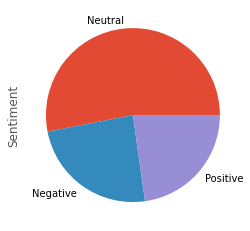

In [ ]:
tweet_df['Sentiment'].value_counts().plot(kind='pie')